In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/smote_data.csv")
data.head()

,Unnamed: 0,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,0,3.361896,3.550984,2.611239,-2.769031,-0.706833,-0.251163,1.345904,-2.773250,-2.763395,-3.173786,2.513624,0.903124,-2.682857e-168,2.091974,-2.447822,2.319065,-0.279537,1
1,1,0.063826,0.602848,0.861115,0.186816,-0.494438,-0.238233,0.021430,0.198412,0.180198,0.172717,-0.189665,0.826112,-2.682857e-168,2.982047,0.579640,-0.585259,1.488499,1
2,2,-0.135972,0.269316,0.571665,0.309337,-0.434281,-0.231959,0.084750,0.313283,0.306865,0.280432,-0.199657,0.690931,-2.682857e-168,3.120156,0.691270,-0.649049,1.524043,1
3,3,0.775895,1.106900,1.240971,-0.641862,-0.623074,-0.247861,3.632878,-0.593926,-0.667392,-0.614715,2.514006,-0.052793,-2.682857e-168,2.378390,-0.880858,0.468841,-1.284084,0
4,4,2.938133,3.025640,2.358081,-2.441043,-0.709102,-0.251401,3.002372,-2.421605,-2.448544,-2.341279,2.807814,0.641309,-2.682857e-168,2.067890,-2.609072,2.566096,-1.284084,0


In [3]:
# Assign the input and the output
X = data.drop('Target', axis=1)
y = data['Target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
#Make predictions on the test set
y_pred = model.predict(X_test)

Accuracy Score: 0.9809322033898306

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       235
           1       0.99      0.97      0.98       237

    accuracy                           0.98       472
   macro avg       0.98      0.98      0.98       472
weighted avg       0.98      0.98      0.98       472


Confusion Matrix:
 [[232   3]
 [  6 231]]


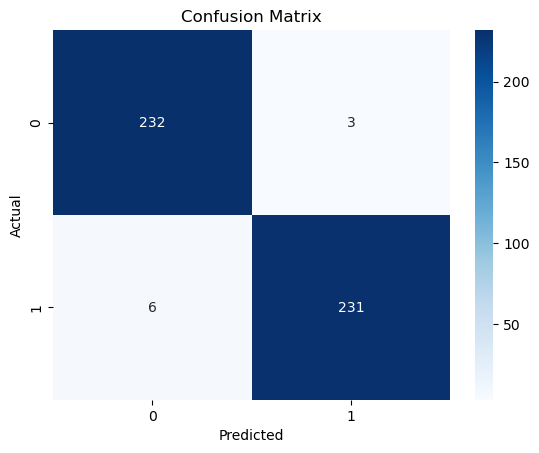

In [7]:
# Evaluation
# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
data

,Unnamed: 0,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,0,3.361896,3.550984,2.611239,-2.769031,-0.706833,-0.251163,1.345904,-2.773250,-2.763395,-3.173786,2.513624,0.903124,-2.682857e-168,2.091974,-2.447822,2.319065,-0.279537,1
1,1,0.063826,0.602848,0.861115,0.186816,-0.494438,-0.238233,0.021430,0.198412,0.180198,0.172717,-0.189665,0.826112,-2.682857e-168,2.982047,0.579640,-0.585259,1.488499,1
2,2,-0.135972,0.269316,0.571665,0.309337,-0.434281,-0.231959,0.084750,0.313283,0.306865,0.280432,-0.199657,0.690931,-2.682857e-168,3.120156,0.691270,-0.649049,1.524043,1
3,3,0.775895,1.106900,1.240971,-0.641862,-0.623074,-0.247861,3.632878,-0.593926,-0.667392,-0.614715,2.514006,-0.052793,-2.682857e-168,2.378390,-0.880858,0.468841,-1.284084,0
4,4,2.938133,3.025640,2.358081,-2.441043,-0.709102,-0.251401,3.002372,-2.421605,-2.448544,-2.341279,2.807814,0.641309,-2.682857e-168,2.067890,-2.609072,2.566096,-1.284084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2351,-0.688334,-0.827614,-1.262079,0.632069,1.669678,0.690678,-0.889712,0.613273,0.642183,0.642707,-0.817362,-1.049325,-2.682857e-168,0.937492,0.895216,-0.756235,-1.284084,0
2352,2352,2.938577,3.025673,2.358098,-2.441562,-0.709114,-0.251401,3.001921,-2.422166,-2.449042,-2.342162,2.807881,0.641374,-2.669004e-168,2.064807,-2.609524,2.566749,-1.284084,0
2353,2353,-0.371817,-0.436789,-0.246381,0.302223,-0.420439,-0.230447,0.324591,0.306606,0.299492,0.285267,0.165385,-0.473881,8.994202e-168,-0.219528,0.378209,-0.457930,-1.284084,0
2354,2354,-0.613199,-0.754002,-0.912654,0.531735,-0.107111,-0.177758,-0.667673,0.520402,0.537677,0.527699,-0.568992,-0.502717,2.899136e-168,0.138226,0.731964,-0.666729,-1.284084,0
